<h1 align="center">Encontrar los bordes</h1>

In [1]:
import SimpleITK as sitk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Cargar la imagen y conseguir el array

Cargo una imagen

In [3]:
img = sitk.ReadImage("data/SimpleITK.jpg")
img

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x12fce6b10> >

Saco el array de la imagen

In [4]:
imgArr = sitk.GetArrayFromImage(img)

Muestro la imagen

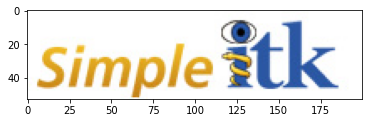

In [5]:
plt.imshow(imgArr)

## Operaciones sobre el array

In [6]:
imgArr.shape

(53, 200, 3)

##### Hacer una operacion sobre un eje del array

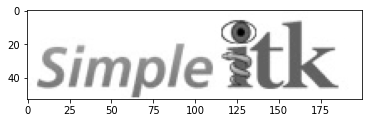

In [20]:
# Hace la media del array en el eje X (axis = X)
meanValue = np.mean(imgArr, axis = -1)
plt.imshow(meanValue, cmap = 'gray')

Hacer la media de los tres canales no es lo mismo que hacer la escala de grises, ya que cada canal realmente tiene una importancia. 

Y = 0.2125 R + 0.7154 G + 0.0721 B

https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html

##### Histograma

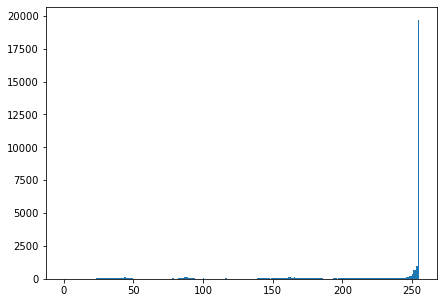

In [7]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
ax.hist(imgArr.flatten(), bins = 255)
plt.show(fig)

## Transformar la imagen

### Binario

In [9]:
# Hago binaria la imagen a color
# np.zeros_like crea una imagen en negro con las mismas dimensiones que la original
colImgBin = np.zeros_like(imgArr)
colImgBin[imgArr < 100] = 1

Se binariza cada canal. Se ve que siguen quedando los tres canales RGB

In [14]:
colImgBin[0:3]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### Escala de grises

In [38]:
from skimage.color import rgb2gray

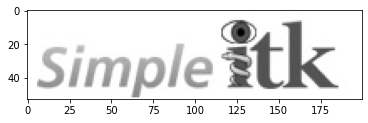

In [39]:
grayscale = rgb2gray(imgArr)
plt.imshow(grayscale, cmap = 'gray')

Se ve que ya solo tiene un canal

In [40]:
grayscale.shape

(53, 200)

In [41]:
print(np.min(grayscale))
print(np.max(grayscale))

0.0025
1.0


Vemos que el rango ha quedado entre 0 y 1, pero lo queremos entre 0 y 255 por lo que vamos a multiplicar

In [42]:
# Paso la escala a 0, 255
grayscale *= 255

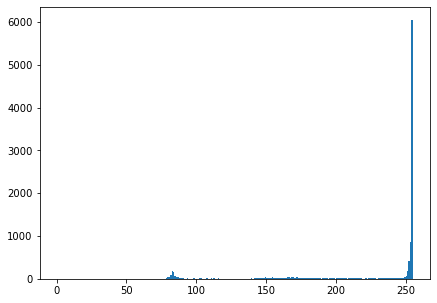

In [43]:
# Muestro el histograma de la imagen en escala de grises
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
ax.hist(grayscale.flatten(), bins = 255)
plt.show(fig)

### Binario

In [44]:
threshold = 230
# Especifico el tipo de valor
imgBin = np.zeros_like(grayscale, dtype = 'uint8')
imgBin[np.where(grayscale > threshold)] = 255

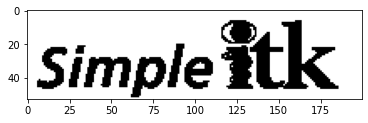

In [45]:
plt.imshow(imgBin, vmin = 0, vmax = 255, cmap = 'gray')

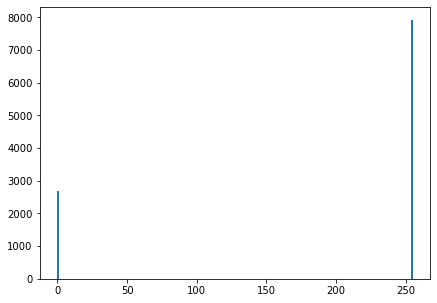

In [46]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
ax.hist(imgBin.flatten(), bins = 255)
plt.show(fig)

## Matriz de distancias

In [48]:
help(sitk.SignedMaurerDistanceMap)

Help on function SignedMaurerDistanceMap in module SimpleITK.SimpleITK:

SignedMaurerDistanceMap(image1, insideIsPositive=False, squaredDistance=True, useImageSpacing=False, backgroundValue=0.0)
    SignedMaurerDistanceMap(Image image1, bool insideIsPositive=False, bool squaredDistance=True, bool useImageSpacing=False, double backgroundValue=0.0) -> Image



Tiene el imput obligatorio de la imagen, pero luego se puede especificar si queremos que coja el interior como positivo y el exterior como negativo, si queremos que calcule la distancia al cuadrado...

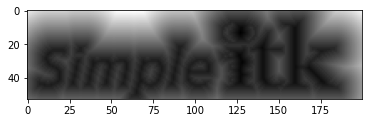

In [49]:
result = sitk.SignedMaurerDistanceMap(sitk.GetImageFromArray(imgBin), 
                                      insideIsPositive = True, 
                                      squaredDistance = False)
result = sitk.GetArrayFromImage(result)
plt.imshow(result, cmap = 'gray')

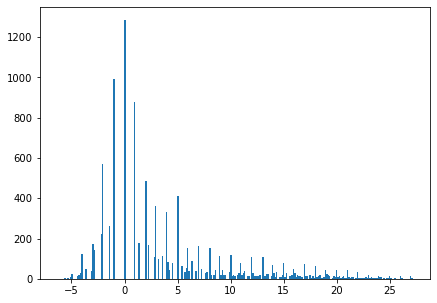

In [208]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
ax.hist(result.flatten(), bins = 255)
plt.show(fig)

### Seleccion de las distancias X

In [51]:
# Nos quedamos con aquellas distancias entre -2 y 5
minThreshold = -2
maxThreshold = 5
mask = np.zeros_like(result, dtype = 'uint8')
mask[np.logical_and(result > minThreshold, result < maxThreshold)] = 1

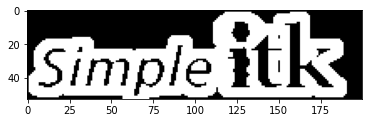

In [52]:
plt.imshow(mask, cmap = 'gray')

### Aplicar la mascara sobre la imagen original

In [53]:
copy = imgArr.copy()

Hay que copiar la imagen porque en python no si copias la variable solo se copia la direccion de donde esta guardada esa imagen, pero no se crea una nueva imagen, por lo que se va a modificar sobre la vieja imagen

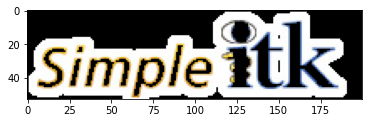

In [54]:
copy[mask == 0] = 0
plt.imshow(copy, cmap = 'gray')